# 1. Package Importing and Data Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import make_scorer,accuracy_score,f1_score,precision_score,recall_score,balanced_accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)
pd.set_option('display.max_columns', None)

In [2]:
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

1.0.2
1.21.5
1.3.4


In [3]:
data = pd.read_csv("genres_v2.csv")
data

D:\Anaconda3\envs\ADA\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


## 2. Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


### Unique values

In [6]:
print(data.apply(lambda column: column.unique()))

danceability        [0.831, 0.7190000000000001, 0.85, 0.476, 0.797...
energy              [0.8140000000000001, 0.493, 0.893, 0.780999999...
key                            [2, 8, 5, 0, 1, 11, 10, 6, 7, 9, 4, 3]
loudness            [-7.364, -7.23, -4.783, -4.71, -7.667999999999...
mode                                                           [1, 0]
speechiness         [0.42, 0.0794, 0.0623, 0.103, 0.293, 0.414, 0....
acousticness        [0.0598, 0.401, 0.0138, 0.0237, 0.217, 0.0452,...
instrumentalness    [0.0134, 0.0, 4.14e-06, 0.212, 0.0078, 0.0311,...
liveness            [0.0556, 0.118, 0.372, 0.114, 0.166, 0.128, 0....
valence             [0.389, 0.124, 0.0391, 0.175, 0.591, 0.109, 0....
tempo               [156.985, 115.08, 218.05, 186.948, 147.988, 14...
type                                                 [audio_features]
id                  [2Vc6NJ9PW9gD9q343XFRKx, 7pgJBLVz5VmnL7uGHmRj6...
uri                 [spotify:track:2Vc6NJ9PW9gD9q343XFRKx, spotify...
track_href          

### The distribution of the numerical features


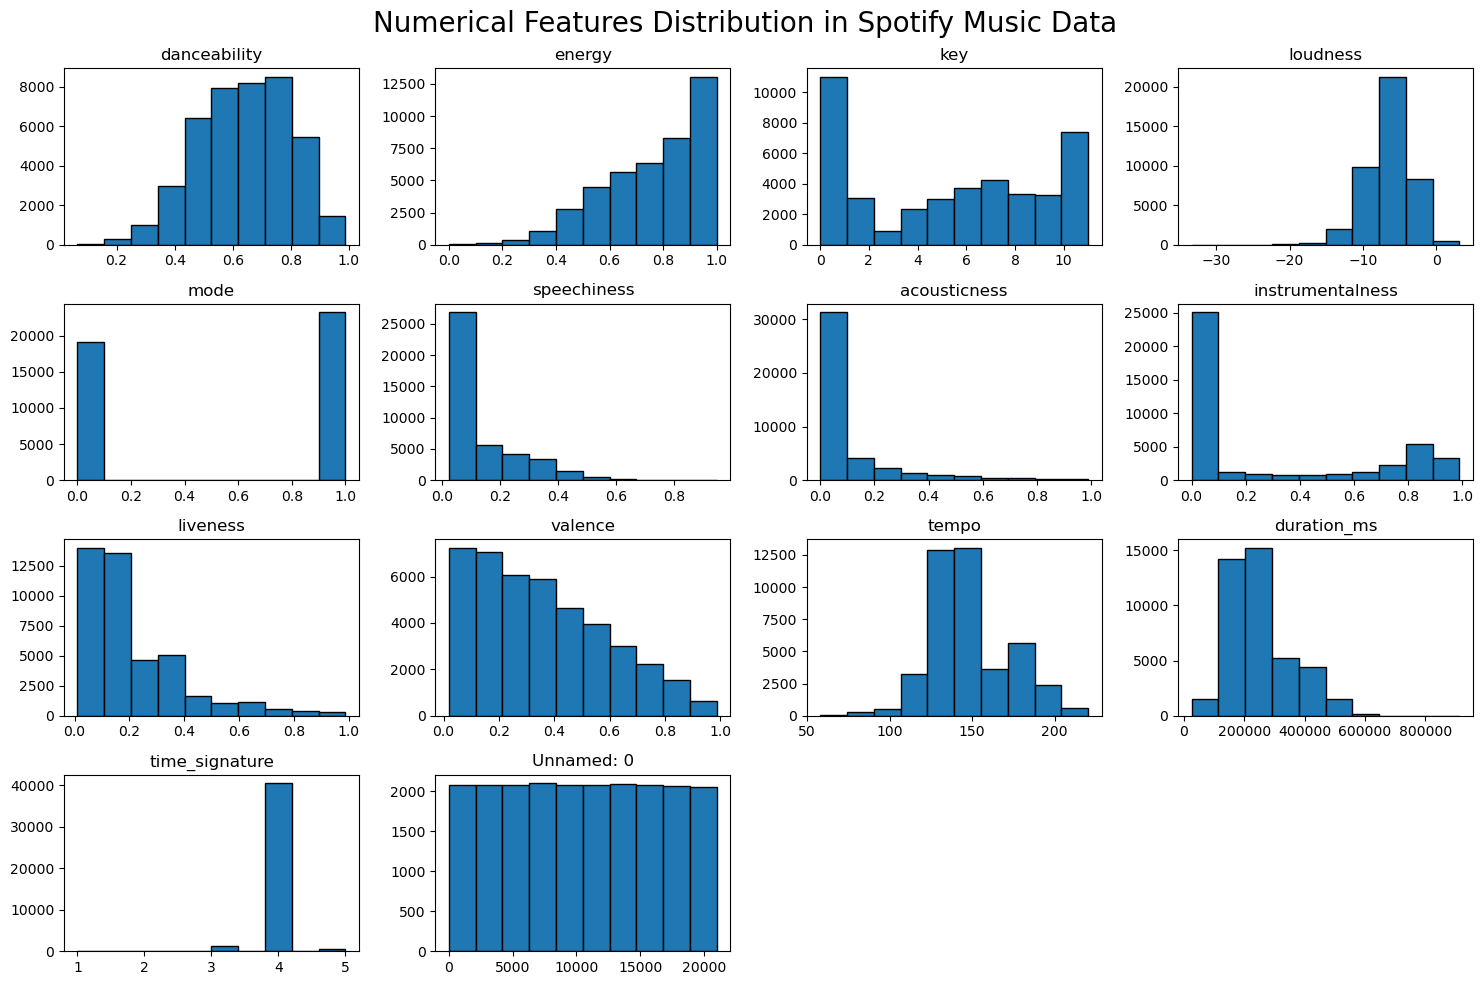

In [74]:
numeric_column = list(data.select_dtypes(include=np.number).columns)


fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(15,10),sharex=False)
fig.suptitle("Numerical Features Distribution in Spotify Music Data", fontsize=20)
for i,ax in enumerate(fig.axes):
    if i <= len(numeric_column) - 1:
        data[[numeric_column[i]]].hist(ax = ax, edgecolor='black',grid = False)
    else:
        axes.flat[i].set_visible(False)
    
plt.tight_layout()

plt.savefig("Numerical Feature.jpg",bbox_inches='tight',dpi = 300)

### The distribution of the labels

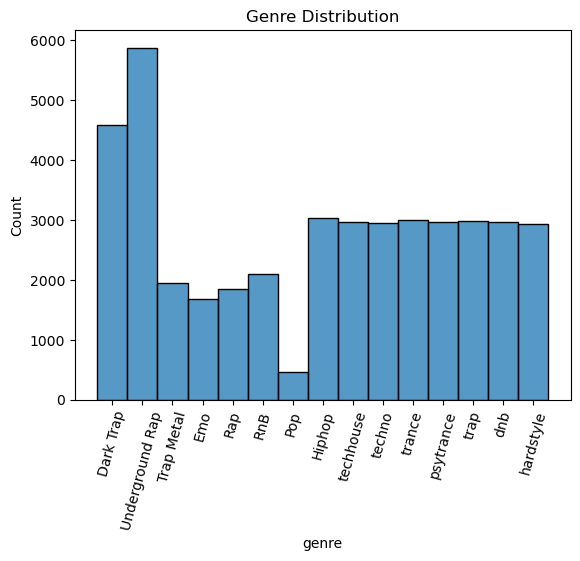

In [72]:
sns.histplot(data = data["genre"])
plt.title("Genre Distribution")
plt.xticks(rotation = 75)

plt.savefig("Genre Distribution.jpg",bbox_inches='tight',dpi = 300)

### The visualization of labels (by color) given two features

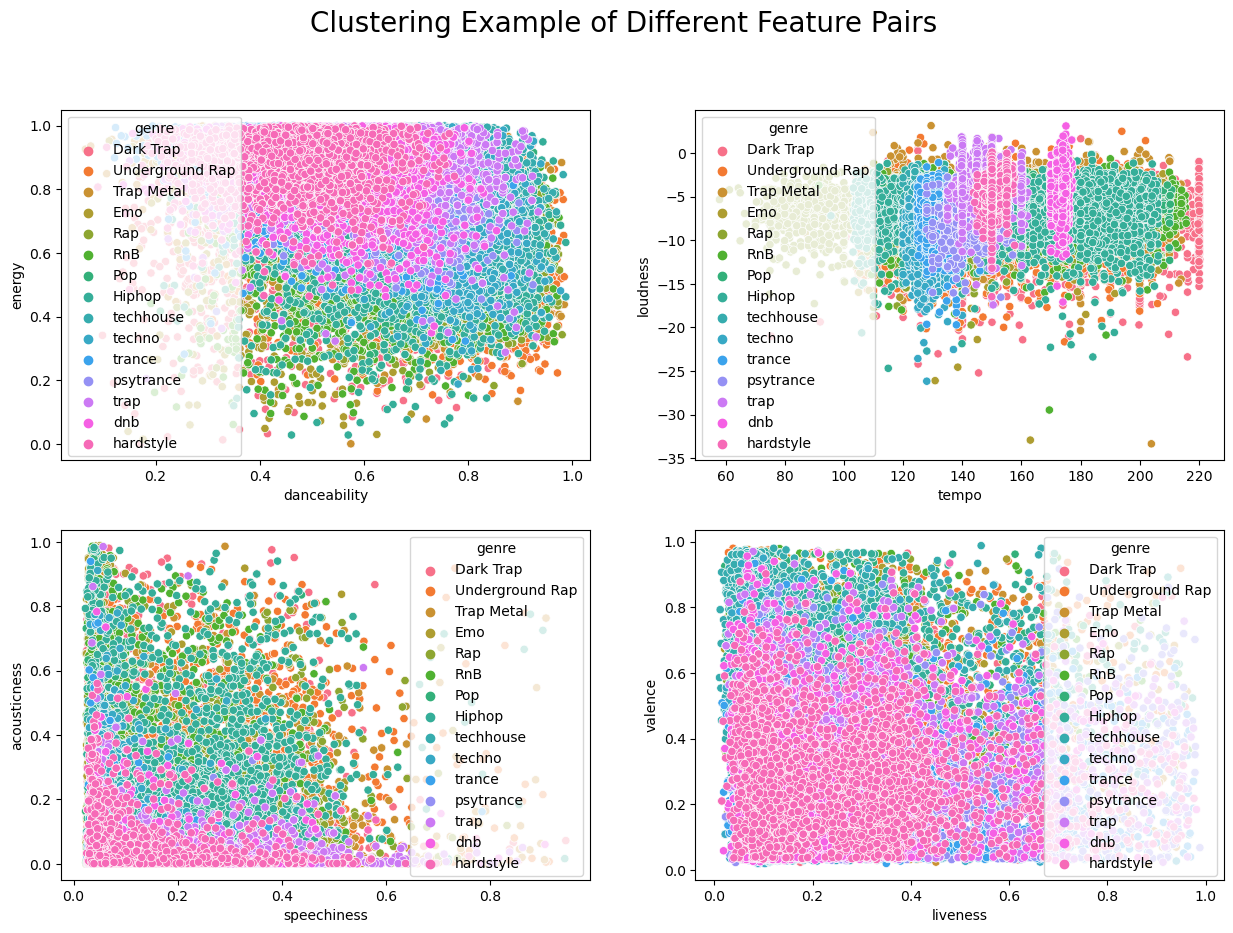

In [71]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharex=False)
fig.suptitle("Clustering Example of Different Feature Pairs", fontsize=20)

sns.scatterplot(x=data["danceability"],y=data["energy"],hue=data["genre"],ax=axes.flat[0])
sns.scatterplot(x=data["tempo"],y=data["loudness"],hue=data["genre"],ax=axes.flat[1])
sns.scatterplot(x=data["speechiness"],y=data["acousticness"],hue=data["genre"],ax=axes.flat[2])
sns.scatterplot(x=data["liveness"],y=data["valence"],hue=data["genre"],ax=axes.flat[3])

plt.savefig("Clustering Example.jpg",bbox_inches='tight',dpi = 300)

## 3. Preprocessing

### 3.1 Delete Unrelated Features

select columns

In [10]:
#Time Signature is imbalanced so we delete it
selected_data = data[["danceability","energy","key","loudness","mode","speechiness","acousticness",
                     "instrumentalness","liveness","valence","tempo","genre"]]
selected_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


### 3.2 Scaling and Encoding

In [11]:
# scale the data between 0 and 1
scaler = MinMaxScaler()
transformed_feature_data = scaler.fit_transform(selected_data.iloc[:,0:11])

# Encode the labels to numbers
le = LabelEncoder()
transformed_label_data = le.fit_transform(selected_data.iloc[:,-1])

features_names = list(selected_data.columns)[0:-1]

print(transformed_feature_data)
print(transformed_label_data)
print(features_names)

[[0.82988406 0.81395479 0.18181818 ... 0.0459429  0.38202827 0.61000598]
 [0.70852747 0.49287677 0.72727273 ... 0.10979228 0.1086351  0.35184786]
 [0.85047134 0.89297399 0.45454545 ... 0.36969201 0.02104612 0.98620035]
 ...
 [0.32061979 0.82095649 0.72727273 ... 0.38299396 0.1086351  0.59737684]
 [0.44631054 0.9209808  0.54545455 ... 0.04788704 0.48416383 0.56723323]
 [0.50265468 0.94498663 0.81818182 ... 0.41266755 0.11895182 0.59806682]]
[0 0 0 ... 9 9 9]
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


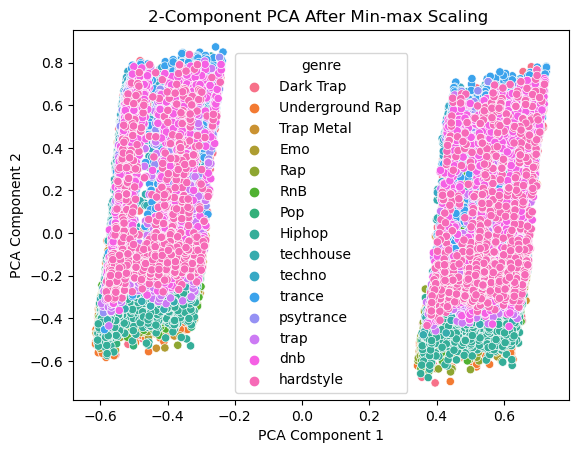

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_comp = pca.fit_transform(transformed_feature_data)
pca_comp

sns.scatterplot(x=pca_comp[:,0],y=pca_comp[:,1],hue=selected_data.iloc[:,-1])
plt.title("2-Component PCA After Min-max Scaling ")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.savefig("PCA.jpg",bbox_inches='tight',dpi = 300)

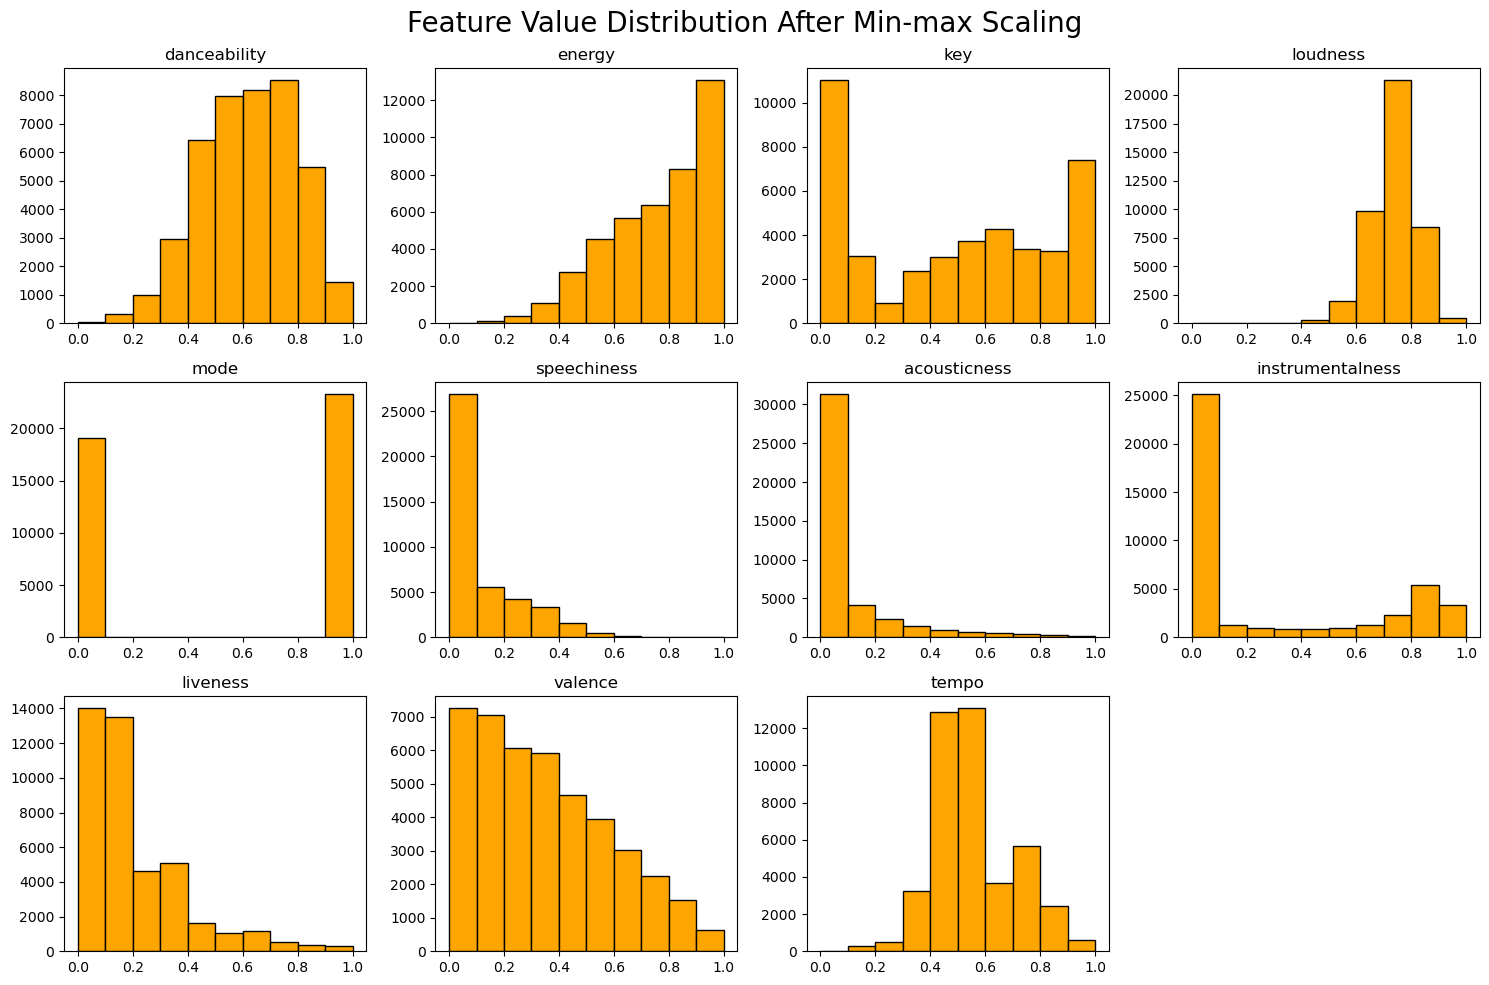

In [76]:
fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10),sharex=False)
fig.suptitle("Feature Value Distribution After Min-max Scaling", fontsize=20)
for i,ax in enumerate(fig.axes):
    if i <= transformed_feature_data.shape[1]-1:
        ax.hist(x = transformed_feature_data[:,i], edgecolor='black',color = "orange")
        ax.axes.set_title(features_names[i])
    else:
        axes.flat[i].set_visible(False)
    
plt.tight_layout()

plt.savefig("Feature Distribution After MinMax.jpg",bbox_inches='tight',dpi = 300)

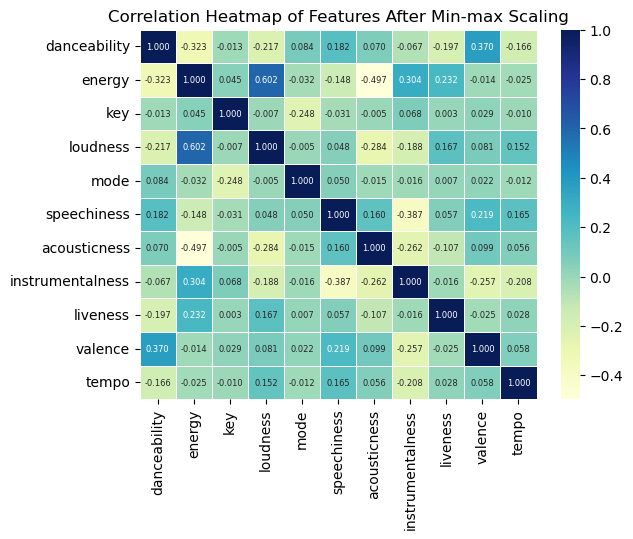

In [75]:
sns.heatmap(pd.DataFrame(transformed_feature_data,columns=features_names).corr(),
            linewidth=0.5,cmap="YlGnBu",annot=True, annot_kws={"fontsize":6},fmt='.3f')
plt.title("Correlation Heatmap of Features After Min-max Scaling")

plt.savefig("Feature Correlation.jpg",bbox_inches='tight',dpi = 300)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(transformed_feature_data,
                                                    transformed_label_data,test_size=0.2,random_state=123)


print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33844, 11) (8461, 11) (33844,) (8461,)


## 4. Apply Machine Learning Methods

### 4.1 KNN

In [16]:
kf = KFold(n_splits=5,random_state=123,shuffle=True)
score_list_KNN = []


classfication_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 }

# This could take 3-5 mins
for num_neighbours in list(range(1,31)):
    KNN_model = KNeighborsClassifier(n_neighbors=num_neighbours)
    score = cross_validate(KNN_model,X_train,y_train,cv = kf,scoring=classfication_scorer)
    score_list_KNN.append(score)
    print("{} Neighbor Finished".format(num_neighbours))
    
    
        
    

1 Neighbor Finished
2 Neighbor Finished
3 Neighbor Finished
4 Neighbor Finished
5 Neighbor Finished
6 Neighbor Finished
7 Neighbor Finished
8 Neighbor Finished
9 Neighbor Finished
10 Neighbor Finished
11 Neighbor Finished
12 Neighbor Finished
13 Neighbor Finished
14 Neighbor Finished
15 Neighbor Finished
16 Neighbor Finished
17 Neighbor Finished
18 Neighbor Finished
19 Neighbor Finished
20 Neighbor Finished
21 Neighbor Finished
22 Neighbor Finished
23 Neighbor Finished
24 Neighbor Finished
25 Neighbor Finished
26 Neighbor Finished
27 Neighbor Finished
28 Neighbor Finished
29 Neighbor Finished
30 Neighbor Finished


In [17]:
print("KNN score_list before being flatted \n")
print(score_list_KNN[0])

KNN score_list before being flatted 

{'fit_time': array([0.09599423, 0.08371615, 0.07813764, 0.0624845 , 0.0781095 ]), 'score_time': array([0.50344896, 0.58064771, 0.56236792, 0.51476169, 0.56545973]), 'test_accuracy': array([0.47983454, 0.49298272, 0.47835722, 0.47717536, 0.47532506]), 'test_precision': array([0.45274766, 0.45978141, 0.4570143 , 0.44722574, 0.45363539]), 'test_recall': array([0.45630307, 0.46664095, 0.46650541, 0.45625002, 0.45971505]), 'test_f1': array([0.45410271, 0.46239881, 0.46090869, 0.45092533, 0.45571425])}


In [18]:
acc_list_KNN = []
precision_list_KNN = []
recall_list_KNN = []
f1_list_KNN = []

for i in range(30):
    acc_list_KNN.append(np.mean(score_list_KNN[i]["test_accuracy"]))
    precision_list_KNN.append(np.mean(score_list_KNN[i]["test_precision"]))
    recall_list_KNN.append(np.mean(score_list_KNN[i]["test_recall"]))
    f1_list_KNN.append(np.mean(score_list_KNN[i]["test_f1"]))
    

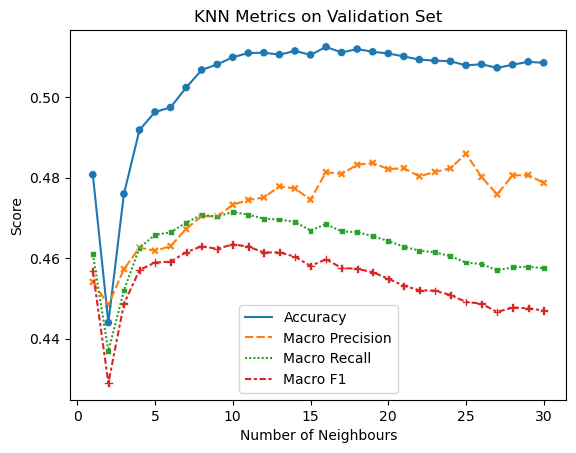

In [67]:
KNN_metric_data = pd.DataFrame([acc_list_KNN,
                                precision_list_KNN,recall_list_KNN,
                                f1_list_KNN]).T.rename(columns = {0:"Accuracy",
                                                                 1:"Macro Precision",
                                                                 2:"Macro Recall",
                                                                 3:"Macro F1"}).set_index(pd.Index(range(1,31)))

sns.lineplot(data = KNN_metric_data)
sns.scatterplot(data = KNN_metric_data,legend=False)
plt.title("KNN Metrics on Validation Set")
plt.xlabel("Number of Neighbours")
plt.ylabel("Score")

plt.savefig("KNN Validation.jpg",bbox_inches='tight',dpi = 300)

In [20]:
print("Best Number of Neighbours: ",np.argmax(f1_list_KNN)+1)  #index +1 = number_of_neighbours
print("Best F1 Score: ",np.max(f1_list_KNN))

Best Number of Neighbours:  10
Best F1 Score:  0.4634340667601122


In [21]:
final_KNN_model = KNeighborsClassifier(n_neighbors=10)
final_KNN_model.fit(X=X_train,y=y_train)
KNN_pred = final_KNN_model.predict(X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,KNN_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,KNN_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,KNN_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,KNN_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,KNN_pred,average='weighted'))

Accuracy Score on Test Set:  0.5245242879092306
Macro Precision Score on Test Set:  0.4823232508946898
Macro Recall Score on Test Set:  0.4804030186474188
Macro F1 Score on Test Set:  0.47442198260223195
Weighted F1 Score on Test Set:  0.5107503498263664


### 4.2 Naive Bayes

In [22]:
#No parameter for NB, so we don't need to tune the hyperparameters
final_naive_bayes_model = GaussianNB()
final_naive_bayes_model.fit(X=X_train,y=y_train)
NB_pred = final_naive_bayes_model.predict(X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,NB_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,NB_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,NB_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,NB_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,NB_pred,average='weighted'))

Accuracy Score on Test Set:  0.5655359886538234
Macro Precision Score on Test Set:  0.5235611860248599
Macro Recall Score on Test Set:  0.5349911000998626
Macro F1 Score on Test Set:  0.5219531384203846
Weighted F1 Score on Test Set:  0.5546685381531898


### 4.3 Multinomial Logistic Regression

In [23]:
#This may take up to 5 mins
LR_param = {"penalty":["l1","l2"],
           "C":[10e-2,10e-1,1,10,100]}

classfication_scorer = {'accuracy': make_scorer(accuracy_score),
                 'f1': make_scorer(f1_score, average='macro')
                 }

kf = KFold(n_splits=5,random_state=123,shuffle=True)
cv_LR = GridSearchCV(estimator=LogisticRegression(random_state=123,max_iter=200,solver="saga"),param_grid= LR_param,
                     scoring= classfication_scorer,cv=kf,refit="f1")



cv_LR.fit(X=X_train,y=y_train)

D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(max_iter=200, random_state=123,
                                          solver='saga'),
             param_grid={'C': [0.1, 1.0, 1, 10, 100], 'penalty': ['l1', 'l2']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro)})

In [24]:
cv_LR.cv_results_

{'mean_fit_time': array([2.20185566, 0.72128868, 6.66000557, 0.87167416, 6.52153158,
        0.88036423, 9.36555429, 1.72731676, 2.78361011, 1.90191455]),
 'std_fit_time': array([0.4409881 , 0.04626058, 1.0660016 , 0.03334586, 0.68471736,
        0.03640133, 0.12601988, 0.16178847, 0.04296884, 0.05512574]),
 'mean_score_time': array([0.00312428, 0.00457377, 0.00623751, 0.00624304, 0.00312424,
        0.00935602, 0.00935988, 0.00643806, 0.        , 0.00312428]),
 'std_score_time': array([0.00624857, 0.00231796, 0.00763935, 0.00764613, 0.00624847,
        0.00763916, 0.00764232, 0.00789128, 0.        , 0.00624857]),
 'param_C': masked_array(data=[0.1, 0.1, 1.0, 1.0, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=[F

In [25]:
print(cv_LR.best_params_)
print(cv_LR.best_estimator_)
print(cv_LR.best_score_)

{'C': 100, 'penalty': 'l2'}
LogisticRegression(C=100, max_iter=200, random_state=123, solver='saga')
0.47191380514554854


In [26]:
final_LR_model = LogisticRegression(penalty="l2",C=100,max_iter=200,random_state=123,solver="saga")
final_LR_model.fit(X=X_train,y=y_train)
LR_pred = final_LR_model.predict(X=X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,LR_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,LR_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,LR_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,LR_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,LR_pred,average='weighted'))

Accuracy Score on Test Set:  0.5468620730410118
Macro Precision Score on Test Set:  0.5172096532308287
Macro Recall Score on Test Set:  0.4860766108026722
Macro F1 Score on Test Set:  0.48070664200252367
Weighted F1 Score on Test Set:  0.5262210530849423


### 4.4 Linear Discriminant Analysis

In [27]:
final_LDA_model = LinearDiscriminantAnalysis()
final_LDA_model.fit(X_train,y_train)
LDA_pred = final_LDA_model.predict(X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,LDA_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,LDA_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,LDA_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,LDA_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,LDA_pred,average='weighted'))

Accuracy Score on Test Set:  0.48493085923649687
Macro Precision Score on Test Set:  0.46920149047883924
Macro Recall Score on Test Set:  0.4429502628266728
Macro F1 Score on Test Set:  0.43691065048467886
Weighted F1 Score on Test Set:  0.4701207131825362


### 4.5 Support Vector Machine

In [28]:
#This may take up to 15 mins
SVM_param = {"penalty":["l1","l2"],
           "C":[10e-1,1,10,100]}

classfication_scorer = {'accuracy': make_scorer(accuracy_score),
                 'f1': make_scorer(f1_score, average='macro')
                 }

kf = KFold(n_splits=5,random_state=123,shuffle=True)
cv_SVM = GridSearchCV(estimator=LinearSVC(random_state=123,dual=False),param_grid= SVM_param,
                     scoring= classfication_scorer,cv=kf,refit="f1",verbose=2)



cv_SVM.fit(X=X_train,y=y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=1.0, penalty=l1; total time=  23.5s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=1.0, penalty=l1; total time=  24.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=1.0, penalty=l1; total time=  23.7s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=1.0, penalty=l1; total time=  24.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=1.0, penalty=l1; total time=  23.6s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....................................C=1, penalty=l1; total time=  43.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....................................C=1, penalty=l1; total time=  42.3s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....................................C=1, penalty=l1; total time=  37.8s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....................................C=1, penalty=l1; total time=  34.9s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ....................................C=1, penalty=l1; total time=  34.4s
[CV] END ....................................C=1, penalty=l2; total time=   1.2s
[CV] END ....................................C=1, penalty=l2; total time=   1.1s
[CV] END ....................................C=1, penalty=l2; total time=   1.2s
[CV] END ....................................C=1, penalty=l2; total time=   1.2s
[CV] END ....................................C=1, penalty=l2; total time=   1.1s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...................................C=10, penalty=l1; total time=  37.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...................................C=10, penalty=l1; total time=  35.7s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...................................C=10, penalty=l1; total time=  34.9s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...................................C=10, penalty=l1; total time=  36.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ...................................C=10, penalty=l1; total time=  36.3s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s
[CV] END ...................................C=10, penalty=l2; total time=   1.1s
[CV] END ...................................C=10, penalty=l2; total time=   1.2s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=100, penalty=l1; total time=  34.1s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=100, penalty=l1; total time=  30.3s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=100, penalty=l1; total time=  30.6s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=100, penalty=l1; total time=  30.3s


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END ..................................C=100, penalty=l1; total time=  30.8s
[CV] END ..................................C=100, penalty=l2; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   0.9s
[CV] END ..................................C=100, penalty=l2; total time=   1.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LinearSVC(dual=False, random_state=123),
             param_grid={'C': [1.0, 1, 10, 100], 'penalty': ['l1', 'l2']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro)},
             verbose=2)

In [29]:
cv_SVM.cv_results_

{'mean_fit_time': array([23.92357345,  0.7861021 , 38.60999284,  1.24716554, 36.14615364,
         1.26933117, 31.30136995,  1.01584878]),
 'std_fit_time': array([0.30989173, 0.01551721, 3.66980623, 0.02885296, 0.76758972,
        0.0554719 , 1.44085922, 0.02853512]),
 'mean_score_time': array([0.0093667 , 0.00624094, 0.00624833, 0.00936341, 0.0062479 ,
        0.01561522, 0.00312405, 0.00936623]),
 'std_score_time': array([7.64788711e-03, 7.64356752e-03, 7.65261175e-03, 7.64519941e-03,
        7.65208590e-03, 7.87431275e-06, 6.24809265e-03, 7.64749727e-03]),
 'param_C': masked_array(data=[1.0, 1.0, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, '

In [30]:
print(cv_SVM.best_params_)
print(cv_SVM.best_estimator_)
print(cv_SVM.best_score_)

{'C': 100, 'penalty': 'l2'}
LinearSVC(C=100, dual=False, random_state=123)
0.41687293369734313


In [31]:
final_SVM_model = LinearSVC(penalty="l2",C=100,random_state=123,dual=False)
final_SVM_model.fit(X=X_train,y=y_train)
SVM_pred = final_SVM_model.predict(X=X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,SVM_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,SVM_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,SVM_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,SVM_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,SVM_pred,average='weighted'))

Accuracy Score on Test Set:  0.5251152346058385
Macro Precision Score on Test Set:  0.46915448356994405
Macro Recall Score on Test Set:  0.45128292826045796
Macro F1 Score on Test Set:  0.4255886046246591
Weighted F1 Score on Test Set:  0.47940179250078513


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.6 Random Forest

### 4.6.1 Normal Grid Search for Random Forest

In [32]:
#This may take up to 30 mins
rf_param = {"n_estimators":[10,100],
           "criterion":["gini","entropy"],
           "min_samples_split":[2,4,8],
           "min_samples_leaf":[1,2,4],
           "max_depth":[8,16]}

classfication_scorer = {'accuracy': make_scorer(accuracy_score),
                 'f1': make_scorer(f1_score, average='macro')
                 }

kf = KFold(n_splits=5,random_state=123,shuffle=True)
cv_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=123),param_grid= rf_param,
                     scoring= classfication_scorer,cv=kf,refit="f1",verbose=2)



cv_rf.fit(X=X_train,y=y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END criter

[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   4.1s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=

[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.6s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.6s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.6s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   6.8s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   6.8s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   6.8s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   6.8s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   7.0s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samp

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.2s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.2s
[CV] END criterion=entropy, max_depth=8, min_sample

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   1.6s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   1.5s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   1.6s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  16.2s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  16.1s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  16.4s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  16.4s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  16.4s
[CV] END criterion=entropy, max_depth=16, m

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=10; total time=   1.1s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  12.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  12.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  13.2s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  15.1s
[CV] END criterion=entropy, max_depth=16, mi

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 16],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 100]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro)},
             verbose=2)

In [33]:
cv_rf.cv_results_

{'mean_fit_time': array([ 0.43141899,  4.15445647,  0.42896762,  4.10063038,  0.40354285,
         4.05656815,  0.42130847,  4.11032085,  0.43748436,  4.12657719,
         0.44002132,  4.12146211,  0.44617081,  4.1597754 ,  0.43015862,
         4.05508738,  0.42071638,  4.09740415,  0.72322154,  7.23633099,
         0.75782676,  7.11547103,  0.69331861,  6.87254319,  0.70127573,
         6.92090306,  0.71624813,  6.99468694,  0.68337522,  6.74665422,
         0.67231417,  6.54147286,  0.67509799,  6.59354234,  0.68227696,
         6.49970093,  1.0427165 , 10.25035524,  1.02351646, 10.23304515,
         1.02357707, 10.21536708,  1.08560734, 10.22650995,  1.01814761,
        10.21847644,  1.04851909, 10.29553447,  1.03552279, 10.15087976,
         1.02725768, 10.15909491,  1.51263695, 10.31541944,  1.65220833,
        16.43531909,  1.67834101, 16.18575392,  1.58946505, 15.69890542,
         1.63715043, 14.65259128,  1.28983335, 12.53176365,  1.22912955,
        12.14487901,  1.17588611, 

In [34]:
print(cv_rf.best_params_)
print(cv_rf.best_estimator_)
print(cv_rf.best_score_)

{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(max_depth=16, min_samples_split=8, random_state=123)
0.598899210959523


In [35]:
final_rf_model = RandomForestClassifier(n_estimators=100,criterion="gini",
                                        max_depth=16,min_samples_leaf=1,
                                        min_samples_split=8,random_state=123)
final_rf_model.fit(X_train,y_train)
rf_pred= final_rf_model.predict(X_test)

print("Selected Final Random Forest Model")
print("Accuracy Score on Test Set: ",accuracy_score(y_test,rf_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,rf_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,rf_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,rf_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,rf_pred,average='weighted'))

Selected Final Random Forest Model
Accuracy Score on Test Set:  0.6585509986999173
Macro Precision Score on Test Set:  0.6591389561199381
Macro Recall Score on Test Set:  0.6033285295200613
Macro F1 Score on Test Set:  0.6099862218479423
Weighted F1 Score on Test Set:  0.6470935827857177


### 4.6.2 Random Forest Feature Importance Selection

In [36]:
#https://mljar.com/blog/feature-importance-in-random-forest/

from sklearn.inspection import permutation_importance
p_i = permutation_importance(final_rf_model, X_test, y_test)
p_i


{'importances_mean': array([ 0.11693653,  0.06200213, -0.00104007,  0.0485049 , -0.00170193,
         0.03072923,  0.02403971,  0.16655242,  0.00139463,  0.02924004,
         0.33260844]),
 'importances_std': array([0.00583841, 0.00197853, 0.00046321, 0.00293586, 0.00121131,
        0.00218059, 0.00162156, 0.00108425, 0.00068672, 0.00231434,
        0.00342333]),
 'importances': array([[ 1.22562345e-01,  1.07906867e-01,  1.16416499e-01,
          1.23862428e-01,  1.13934523e-01],
        [ 5.88582910e-02,  6.35858646e-02,  6.06311311e-02,
          6.27585392e-02,  6.41768113e-02],
        [-2.36378679e-04, -1.30008273e-03, -1.30008273e-03,
         -1.53646141e-03, -8.27325375e-04],
        [ 4.66847890e-02,  5.24760667e-02,  4.56210850e-02,
          4.60938423e-02,  5.16487413e-02],
        [-2.36378679e-04, -3.78205886e-03, -8.27325375e-04,
         -2.00921877e-03, -1.65465075e-03],
        [ 3.28566363e-02,  2.80108734e-02,  3.23838790e-02,
          2.81290628e-02,  3.22656896e-

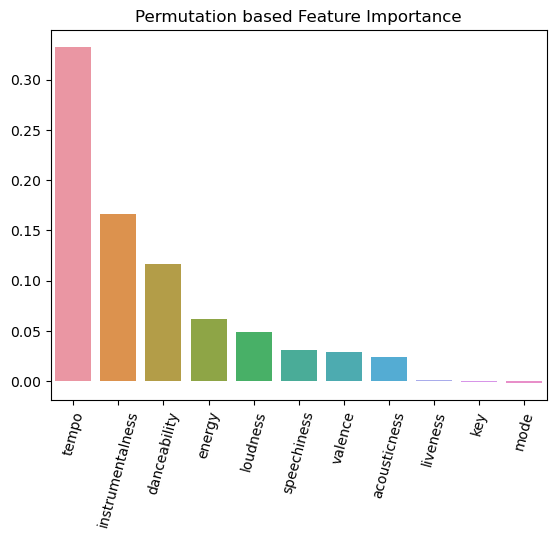

In [64]:
p_i_idx = np.argsort(p_i["importances_mean"])[::-1]
sns.barplot(x=[features_names[i] for i in p_i_idx],y=p_i["importances_mean"][p_i_idx])
plt.title("Permutation based Feature Importance")
plt.xticks(rotation = 75)

plt.savefig("Feature Importance.jpg",bbox_inches='tight',dpi = 300)

In [38]:
final_rf_model2 = RandomForestClassifier(n_estimators=100,criterion="gini",
                                        max_depth=16,min_samples_leaf=1,
                                        min_samples_split=8,random_state=123)

#Delete Key, Mode and Liveness
final_rf_model2.fit(X_train[:,[0,1,3,5,6,7,9,10]],y_train)
rf_pred2= final_rf_model2.predict(X_test[:,[0,1,3,5,6,7,9,10]])

print("Random Forest Model with Most Important Features")
print("Accuracy Score on Test Set: ",accuracy_score(y_test,rf_pred2))
print("Macro Precision Score on Test Set: ",precision_score(y_test,rf_pred2,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,rf_pred2,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,rf_pred2,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,rf_pred2,average='weighted'))

Random Forest Model with Most Important Features
Accuracy Score on Test Set:  0.6559508332348423
Macro Precision Score on Test Set:  0.6519171540854666
Macro Recall Score on Test Set:  0.60003769316847
Macro F1 Score on Test Set:  0.6065235304296136
Weighted F1 Score on Test Set:  0.6442489585671958


### 4.7 Multi Layer Perceptron

In [42]:
# This would take 20-30 mins
MLP_param = {"hidden_layer_sizes":[(100,),(100,50,),(200,100,50)],
           "activation":["relu","tanh"],
            "alpha": np.logspace(-4,-1,4),
             "learning_rate_init":[0.001,0.01,0.1]
            }


MLP_score_list = []
for i1,hidden_layer_size in enumerate(MLP_param["hidden_layer_sizes"]):
    for i2,activation in enumerate(MLP_param["activation"]):
        for i3,alpha in enumerate(MLP_param["alpha"]):
            for i4,learning_rate_init in enumerate(MLP_param["learning_rate_init"]):
                #Early Stopping Already Used Validation
                MLP_model = MLPClassifier(random_state = 123, early_stopping=True,
                                         hidden_layer_sizes = hidden_layer_size,activation = activation,
                                         alpha=alpha,learning_rate_init=learning_rate_init)
                MLP_model.fit(X_train,y_train)
                MLP_pred = MLP_model.predict(X_test)
                
                score_MLP = [[i1,i2,i3,i4],accuracy_score(y_test,MLP_pred),
                            precision_score(y_test,MLP_pred,average="macro"),
                            recall_score(y_test,MLP_pred,average="macro"),
                            f1_score(y_test,MLP_pred,average="macro")]
                MLP_score_list.append(score_MLP)
                print("hidden_layer_sizes: {}, activation: {}, alpha: {}, learning_rate_init: {} Finished".format(hidden_layer_size,
                                                                                                        activation,alpha,
                                                                                                        learning_rate_init))
                
                
                

hidden_layer_sizes: (100,), activation: relu, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.0001, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.001, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.01, learning_rate_init: 0.001 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100,), activation: relu, alpha: 0.01, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.01, learning_rate_init: 0.1 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100,), activation: relu, alpha: 0.1, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: relu, alpha: 0.1, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100,), activation: relu, alpha: 0.1, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.0001, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.001, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.01, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.01, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.01, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100,), activation: tanh, alpha: 0.1, learn

D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100,), activation: tanh, alpha: 0.1, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100,), activation: tanh, alpha: 0.1, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.001 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.001 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.1 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.001 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.001 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.01, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: relu, alpha: 0.1, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.0001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.01 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.01, learning_rate_init: 0.1 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.001 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.01 Finished
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.1, learning_rate_init: 0.1 Finished


D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
MLP_score_list

[[[0, 0, 0, 0],
  0.6434227632667533,
  0.6197432379793082,
  0.5912132998237438,
  0.5918121969809513],
 [[0, 0, 0, 1],
  0.649332230232833,
  0.6383376430006873,
  0.5935799893294801,
  0.5944361224037276],
 [[0, 0, 0, 2],
  0.6082023401489186,
  0.5764622758906658,
  0.544042592443119,
  0.543877838354192],
 [[0, 0, 1, 0],
  0.6190757593665052,
  0.6035448872347329,
  0.5566925477052245,
  0.5542964317170961],
 [[0, 0, 1, 1],
  0.6461411180711499,
  0.6250912504134267,
  0.5931606634690761,
  0.5873819634870082],
 [[0, 0, 1, 2],
  0.6122207776858527,
  0.5860781066691987,
  0.5504850840795241,
  0.5546512017472818],
 [[0, 0, 2, 0],
  0.6145845644722846,
  0.6355153838037674,
  0.5573456839180164,
  0.555962740567832],
 [[0, 0, 2, 1],
  0.6416499231769295,
  0.6011898014599698,
  0.5791659130817135,
  0.572070198956773],
 [[0, 0, 2, 2],
  0.6119843990072096,
  0.597601408957067,
  0.551953986225137,
  0.5556597333674336],
 [[0, 0, 3, 0],
  0.6059567427018083,
  0.5586911580722407,
  

In [46]:
acc_MLP_list = [i[1] for i in MLP_score_list]
f1_MLP_list = [i[4] for i in MLP_score_list]

acc_MLP_max_idx = np.argmax(acc_MLP_list)
f1_MLP_max_idx = np.argmax(f1_MLP_list)

acc_para_setting = MLP_score_list[acc_MLP_max_idx][0]
f1_para_setting = MLP_score_list[f1_MLP_max_idx][0]



In [49]:
print("hidden_layer_sizes: {}, activation: {}, alpha: {}, learning_rate_init: {} with the Best Accuracy on the Test Set".format(
    MLP_param["hidden_layer_sizes"][acc_para_setting[0]],
    MLP_param["activation"][acc_para_setting[1]],
    MLP_param["alpha"][acc_para_setting[2]],
    MLP_param["learning_rate_init"][acc_para_setting[3]]))


print("hidden_layer_sizes: {}, activation: {}, alpha: {}, learning_rate_init: {} with the Best F1 Score on the Test Set".format(
    MLP_param["hidden_layer_sizes"][f1_para_setting[0]],
    MLP_param["activation"][f1_para_setting[1]],
    MLP_param["alpha"][f1_para_setting[2]],
    MLP_param["learning_rate_init"][f1_para_setting[3]]))

hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.001 with the Best Accuracy on the Test Set
hidden_layer_sizes: (200, 100, 50), activation: tanh, alpha: 0.001, learning_rate_init: 0.001 with the Best F1 Score on the Test Set


In [50]:
Final_MLP_model = MLPClassifier(random_state = 123, early_stopping=True,
                                         hidden_layer_sizes = (200,100,50),activation = "tanh",
                                         alpha=0.001,learning_rate_init=0.001)
Final_MLP_model.fit(X_train,y_train)
MLP_Final_pred = Final_MLP_model.predict(X_test)

print("Accuracy Score on Test Set: ",accuracy_score(y_test,MLP_Final_pred))
print("Macro Precision Score on Test Set: ",precision_score(y_test,MLP_Final_pred,average='macro'))
print("Macro Recall Score on Test Set: ",recall_score(y_test,MLP_Final_pred,average='macro'))
print("Macro F1 Score on Test Set: ",f1_score(y_test,MLP_Final_pred,average='macro'))
print("Weighted F1 Score on Test Set: ",f1_score(y_test,MLP_Final_pred,average='weighted'))

Accuracy Score on Test Set:  0.6553598865382343
Macro Precision Score on Test Set:  0.6556475288294978
Macro Recall Score on Test Set:  0.5943057160700594
Macro F1 Score on Test Set:  0.5996247063330603
Weighted F1 Score on Test Set:  0.6411816136630489


## 5. Summary

In [51]:
acc_list = [accuracy_score(y_test,KNN_pred),accuracy_score(y_test,NB_pred),accuracy_score(y_test,LR_pred),
            accuracy_score(y_test,LDA_pred),accuracy_score(y_test,SVM_pred),accuracy_score(y_test,rf_pred),
           accuracy_score(y_test,rf_pred2),accuracy_score(y_test,MLP_Final_pred)]

macro_precision_list = [precision_score(y_test,KNN_pred,average="macro"),precision_score(y_test,NB_pred,average="macro"),
                        precision_score(y_test,LR_pred,average="macro"),precision_score(y_test,LDA_pred,average="macro"),
                        precision_score(y_test,SVM_pred,average="macro"),precision_score(y_test,rf_pred,average="macro"),
           precision_score(y_test,rf_pred2,average="macro"),precision_score(y_test,MLP_Final_pred,average="macro")]

macro_recall_list = [recall_score(y_test,KNN_pred,average="macro"),recall_score(y_test,NB_pred,average="macro"),
                        recall_score(y_test,LR_pred,average="macro"),recall_score(y_test,LDA_pred,average="macro"),
                        recall_score(y_test,SVM_pred,average="macro"),recall_score(y_test,rf_pred,average="macro"),
           recall_score(y_test,rf_pred2,average="macro"),recall_score(y_test,MLP_Final_pred,average="macro")]

macro_f1_list = [f1_score(y_test,KNN_pred,average="macro"),f1_score(y_test,NB_pred,average="macro"),
                        f1_score(y_test,LR_pred,average="macro"),f1_score(y_test,LDA_pred,average="macro"),
                        f1_score(y_test,SVM_pred,average="macro"),f1_score(y_test,rf_pred,average="macro"),
           f1_score(y_test,rf_pred2,average="macro"),f1_score(y_test,MLP_Final_pred,average="macro")]

weighted_f1_list = [f1_score(y_test,KNN_pred,average="weighted"),f1_score(y_test,NB_pred,average="weighted"),
                        f1_score(y_test,LR_pred,average="weighted"),f1_score(y_test,LDA_pred,average="weighted"),
                        f1_score(y_test,SVM_pred,average="weighted"),f1_score(y_test,rf_pred,average="weighted"),
           f1_score(y_test,rf_pred2,average="weighted"),f1_score(y_test,MLP_Final_pred,average="weighted")]


    
    

D:\Anaconda3\envs\ADA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
metric_df = pd.DataFrame([acc_list,macro_precision_list,
                          macro_recall_list,macro_f1_list,
                          weighted_f1_list],columns=["K-Nearest Neighbor","Naive Bayes",
                                                     "Logistic Regression",
                                                    "Linear Discriminant Analysis",
                                                    "Support Vector Machine",
                                                    "Random Forest",
                                                    "Random Forest with Feature Selection",
                                                    "Multi-layer Perceptron"]).set_index(pd.Index(["Accuracy",
                                                                                                   "Macro Precision",
                                                                                                   "Macro Recall",
                                                                                                   "Macro F1",
                                                                                                   "Weighted F1"]))
metric_df

,K-Nearest Neighbor,Naive Bayes,Logistic Regression,Linear Discriminant Analysis,Support Vector Machine,Random Forest,Random Forest with Feature Selection,Multi-layer Perceptron
Accuracy,0.524524,0.565536,0.546862,0.484931,0.525115,0.658551,0.655951,0.655360
Macro Precision,0.482323,0.523561,0.517210,0.469201,0.469154,0.659139,0.651917,0.655648
Macro Recall,0.480403,0.534991,0.486077,0.442950,0.451283,0.603329,0.600038,0.594306
Macro F1,0.474422,0.521953,0.480707,0.436911,0.425589,0.609986,0.606524,0.599625
Weighted F1,0.510750,0.554669,0.526221,0.470121,0.479402,0.647094,0.644249,0.641182


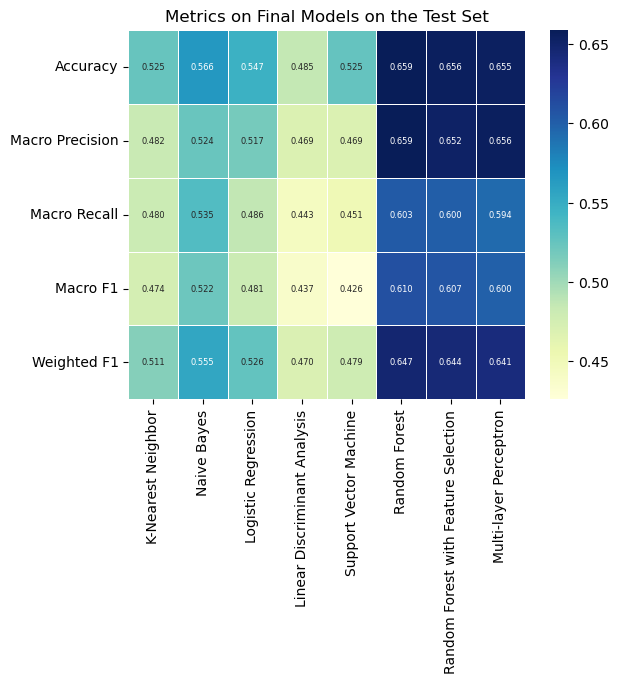

In [63]:
sns.heatmap(metric_df,
            linewidth=0.5,cmap="YlGnBu",annot=True, annot_kws={"fontsize":6},fmt='.3f')
plt.title("Metrics on Final Models on the Test Set")
plt.savefig("Final Metrics.jpg",bbox_inches='tight',dpi = 300)

In [66]:
metric_df.to_csv("Metrics Values.csv",index=True)